<a href="https://colab.research.google.com/github/TanviJesmi-git/Driver-Drowsiness-Detection/blob/main/crop_reccomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Crop_recommendation.csv')

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [ ]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [ ]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
X=df.drop('label',axis=1)
Y=df['label']



In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [ ]:
model=RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_leaf=2,random_state=42)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

In [ ]:
Y_pred = model.predict(X_test)


Accuracy: 0.9954545454545455

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00    

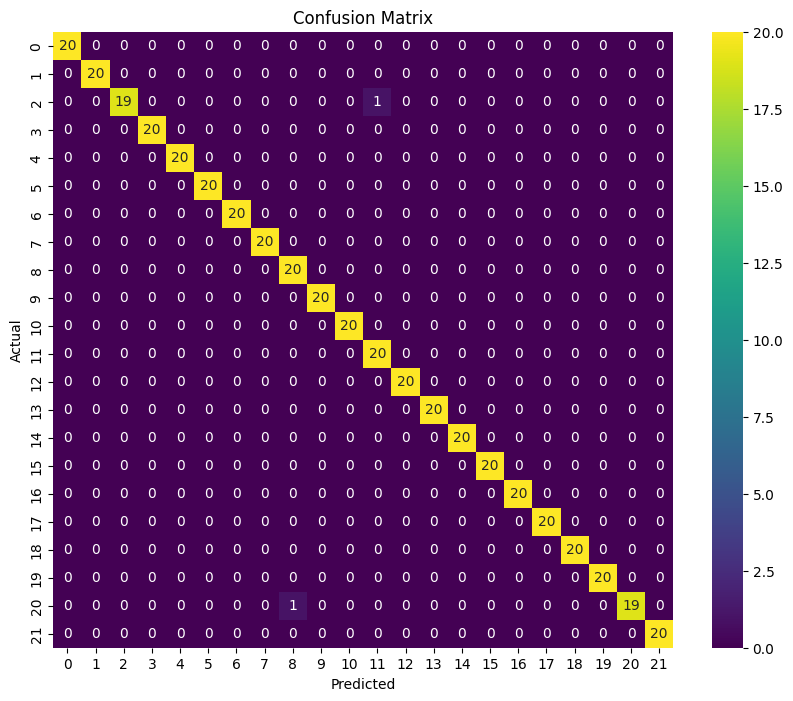

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Detailed metrics
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

# Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(Y_test, Y_pred),
            annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:

train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.9971590909090909
Test Accuracy: 0.9954545454545455


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, Y, cv=5)
print("Mean CV Accuracy:", cv_scores.mean())


Mean CV Accuracy: 0.9922727272727274


In [ ]:
import pickle

with open("crop_recommendation_model.pkl", "wb") as file:
    pickle.dump(model, file)

print(" Model saved as crop_recommendation_model.pkl")


 Model saved as crop_recommendation_model.pkl


In [ ]:
import pickle

with open("crop_recommendation_model.pkl", "rb") as file:
    model = pickle.load(file)

sample = [[90, 40, 40, 25.5, 70.2, 6.5, 200]]  # [N, P, K, temp, humidity, ph, rainfall]
prediction = model.predict(sample)

# Convert encoded label back to crop name
crop_name = le.inverse_transform([prediction])[0]

print("Predicted Crop:", crop_name)

Predicted Crop: coffee


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pip install requests


In [34]:
import requests
import json

API_KEY = "adfe3c7b3cbba1e0babaa23bbabaf7ac"

def get_weather_data(city, state, country="India"):
    # Step 1: Get latitude & longitude
    geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{state},{country}&limit=1&appid={API_KEY}"
    geo_response = requests.get(geo_url).json()

    if not geo_response:
        return {"error": "Location not found"}

    lat = geo_response[0]["lat"]
    lon = geo_response[0]["lon"]

    # Step 2: Fetch weather using lat/lon
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=metric&appid={API_KEY}"
    weather_response = requests.get(weather_url).json()

    # Step 3: Extract fields
    temp = weather_response["main"]["temp"]
    humidity = weather_response["main"]["humidity"]
    rainfall = weather_response.get("rain", {}).get("1h", 0)  # default 0 if not present

    # Step 3: Soil data (try 0–5cm, else 0–30cm)
    def fetch_soil(depth):
        soil_url = (
            f"https://rest.isric.org/soilgrids/v2.0/properties/query?"
            f"lat={lat}&lon={lon}&property=phh2o&property=nitrogen&depth={depth}"
        )
        return requests.get(soil_url).json()

    soil_response = fetch_soil("0-5cm")

    # Extract safely
    def parse_soil(resp):
        result = {"ph": None, "nitrogen": None}
        if "properties" not in resp:
            return result
        for layer in resp["properties"]["layers"]:
            name = layer["name"]
            values = layer["depths"][0]["values"]
            mean = values.get("mean")
            if mean is None:
                continue
            if name == "phh2o":
                result["ph"] = mean / 10  # stored as pH*10
            elif name == "nitrogen":
                result["nitrogen"] = mean / 100  # stored in cg/kg → g/kg
        return result

    soil_data = parse_soil(soil_response)

    # Retry with 0–30cm if null
    if soil_data["ph"] is None or soil_data["nitrogen"] is None:
        soil_response = fetch_soil("0-30cm")
        retry_data = parse_soil(soil_response)
        if soil_data["ph"] is None:
            soil_data["ph"] = retry_data["ph"]
        if soil_data["nitrogen"] is None:
            soil_data["nitrogen"] = retry_data["nitrogen"]

    return {
        "temperature": temp,
        "humidity": humidity,
        "rainfall": rainfall,
        "ph": soil_data["ph"],
        "nitrogen": soil_data["nitrogen"]
    }



In [35]:
# Example usage
state = input("Enter your state: ")
city = input("Enter your city: ")

# Fetch weather data
weather = get_weather_data(city, state)

# Show result
if "error" in weather:
    print(weather["error"])
else:
    print(f"Temperature: {weather['temperature']}°C, Humidity: {weather['humidity']}%, Rainfall: {weather['rainfall']} mm,ph: {weather['ph']}, N: {weather['nitrogen']}")


Enter your state: Maharashtra
Enter your city: Nagpur
Temperature: 27.89°C, Humidity: 78%, Rainfall: 0 mm,ph: None, N: None
